In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File path of your train_data file
file_path = 'Genre Classification Dataset/train_data.txt'  

# Empty lists to store each column
ids = []
titles = []
genres = []
descriptions = []

# Open and read the file
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(':::')
        
        # Remove extra spaces
        parts = [p.strip() for p in parts]
        
        # Safety check to avoid errors if line is incomplete
        if len(parts) == 4:
            ids.append(parts[0])
            titles.append(parts[1])
            genres.append(parts[2])
            descriptions.append(parts[3])


In [2]:
# Create a pandas DataFrame
data = pd.DataFrame({
    'ID': ids,
    'Title': titles,
    'Genre': genres,
    'Description': descriptions
})


In [3]:
# View the first few rows
print(data.head())

# Check shape of the dataset
print(f"Total movies: {data.shape[0]}")

  ID                             Title     Genre  \
0  1      Oscar et la dame rose (2009)     drama   
1  2                      Cupid (1997)  thriller   
2  3  Young, Wild and Wonderful (1980)     adult   
3  4             The Secret Sin (1915)     drama   
4  5            The Unrecovered (2007)     drama   

                                         Description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  
Total movies: 54214


In [4]:
unique_genres = data['Genre'].unique()
print(f"Unique genres ({len(unique_genres)}):")
print(unique_genres)

Unique genres (27):
['drama' 'thriller' 'adult' 'documentary' 'comedy' 'crime' 'reality-tv'
 'horror' 'sport' 'animation' 'action' 'fantasy' 'short' 'sci-fi' 'music'
 'adventure' 'talk-show' 'western' 'family' 'mystery' 'history' 'news'
 'biography' 'romance' 'game-show' 'musical' 'war']


In [5]:
genre_counts = data['Genre'].value_counts()
print(genre_counts)

Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64


In [6]:
print(data.isnull().sum())

ID             0
Title          0
Genre          0
Description    0
dtype: int64


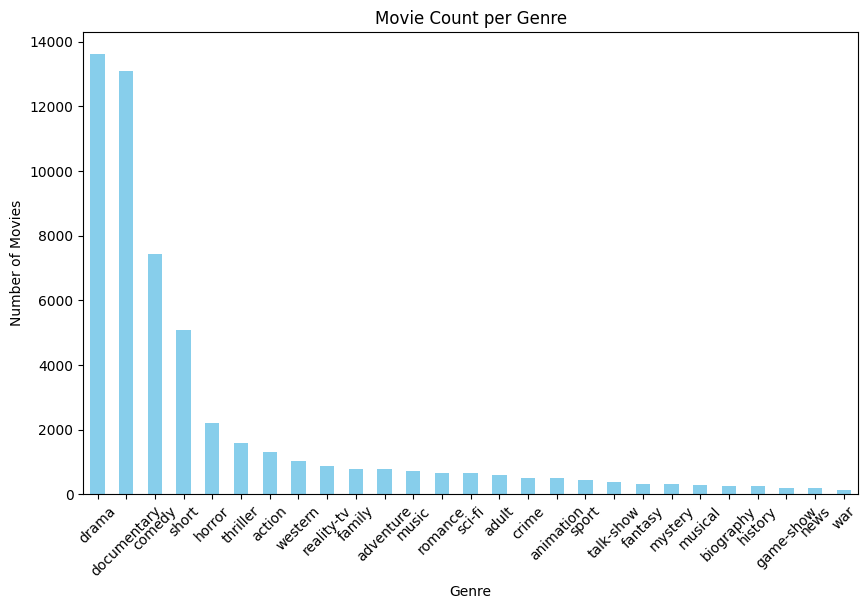

In [7]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Movie Count per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# adjust max_features as per your system capacity (start small for practice)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and Transform the Description Column
X = tfidf_vectorizer.fit_transform(data['Description'])

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Convert genres to numerical labels
y = label_encoder.fit_transform(data['Genre'])

# Optional: Check mapping of genre to numeric label
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'action': np.int64(0), 'adult': np.int64(1), 'adventure': np.int64(2), 'animation': np.int64(3), 'biography': np.int64(4), 'comedy': np.int64(5), 'crime': np.int64(6), 'documentary': np.int64(7), 'drama': np.int64(8), 'family': np.int64(9), 'fantasy': np.int64(10), 'game-show': np.int64(11), 'history': np.int64(12), 'horror': np.int64(13), 'music': np.int64(14), 'musical': np.int64(15), 'mystery': np.int64(16), 'news': np.int64(17), 'reality-tv': np.int64(18), 'romance': np.int64(19), 'sci-fi': np.int64(20), 'short': np.int64(21), 'sport': np.int64(22), 'talk-show': np.int64(23), 'thriller': np.int64(24), 'war': np.int64(25), 'western': np.int64(26)}


In [10]:
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (54214, 5000)
Target vector shape: (54214,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 43371
Testing samples: 10843


In [12]:
# Initialize Logistic Regression
model = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warning

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

      action       0.52      0.26      0.35       263
       adult       0.75      0.21      0.33       112
   adventure       0.43      0.14      0.22       139
   animation       0.60      0.09      0.15       104
   biography       0.00      0.00      0.00        61
      comedy       0.52      0.59      0.55      1443
       crime       0.29      0.02      0.04       107
 documentary       0.66      0.84      0.74      2659
       drama       0.55      0.78      0.64      2697
      family       0.41      0.07      0.12       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.94      0.42      0.59        40
     history       0.00      0.00      0.00        45
      horror       0.64      0.56      0.60       431
       music       0.63      0.47      0.53       144
     musical       0.50      0.02      0.04        50
     mystery       0.00      0.00      0.00

C:\Users\Mrunal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrunal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrunal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [14]:
# File path for test data
test_file_path = 'Genre Classification Dataset/test_data.txt'

# Lists to store data
test_ids = []
test_titles = []
test_descriptions = []

# Read file
with open(test_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(':::')
        parts = [p.strip() for p in parts]
        
        if len(parts) == 3:
            test_ids.append(parts[0])
            test_titles.append(parts[1])
            test_descriptions.append(parts[2])

# Create DataFrame
test_data = pd.DataFrame({
    'ID': test_ids,
    'Title': test_titles,
    'Description': test_descriptions
})

print(test_data.head())


  ID                        Title  \
0  1         Edgar's Lunch (1998)   
1  2     La guerra de papá (1977)   
2  3  Off the Beaten Track (2010)   
3  4       Meu Amigo Hindu (2015)   
4  5            Er nu zhai (1955)   

                                         Description  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family o...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...  


In [15]:
# Transform Descriptions Using Same TF-IDF Vectorizer
X_test_final = tfidf_vectorizer.transform(test_data['Description'])

In [16]:
# Predict numeric labels
y_pred_final = model.predict(X_test_final)

# Convert numeric labels back to genre names
predicted_genres = label_encoder.inverse_transform(y_pred_final)

# Add predictions to test_data
test_data['Predicted_Genre'] = predicted_genres
print(test_data.head())


  ID                        Title  \
0  1         Edgar's Lunch (1998)   
1  2     La guerra de papá (1977)   
2  3  Off the Beaten Track (2010)   
3  4       Meu Amigo Hindu (2015)   
4  5            Er nu zhai (1955)   

                                         Description Predicted_Genre  
0  L.R. Brane loves his life - his car, his apart...           short  
1  Spain, March 1964: Quico is a very naughty chi...           drama  
2  One year in the life of Albin and his family o...     documentary  
3  His father has died, he hasn't spoken with his...           drama  
4  Before he was known internationally as a marti...           drama  


In [17]:
# File path for solution
solution_file_path = 'Genre Classification Dataset/test_data_solution.txt'

# Lists for true values
sol_ids = []
sol_titles = []
sol_genres = []
sol_descriptions = []

with open(solution_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(':::')
        parts = [p.strip() for p in parts]
        
        if len(parts) == 4:
            sol_ids.append(parts[0])
            sol_titles.append(parts[1])
            sol_genres.append(parts[2])
            sol_descriptions.append(parts[3])

# Create DataFrame
solution_data = pd.DataFrame({
    'ID': sol_ids,
    'Title': sol_titles,
    'Genre': sol_genres,
    'Description': sol_descriptions
})

print(solution_data.head())


  ID                        Title        Genre  \
0  1         Edgar's Lunch (1998)     thriller   
1  2     La guerra de papá (1977)       comedy   
2  3  Off the Beaten Track (2010)  documentary   
3  4       Meu Amigo Hindu (2015)        drama   
4  5            Er nu zhai (1955)        drama   

                                         Description  
0  L.R. Brane loves his life - his car, his apart...  
1  Spain, March 1964: Quico is a very naughty chi...  
2  One year in the life of Albin and his family o...  
3  His father has died, he hasn't spoken with his...  
4  Before he was known internationally as a marti...  


In [18]:
# Merge predictions and true genres based on ID
merged_data = pd.merge(test_data, solution_data[['ID', 'Genre']], on='ID', how='inner')
merged_data.rename(columns={'Genre': 'True_Genre'}, inplace=True)

print(merged_data.head())

  ID                        Title  \
0  1         Edgar's Lunch (1998)   
1  2     La guerra de papá (1977)   
2  3  Off the Beaten Track (2010)   
3  4       Meu Amigo Hindu (2015)   
4  5            Er nu zhai (1955)   

                                         Description Predicted_Genre  \
0  L.R. Brane loves his life - his car, his apart...           short   
1  Spain, March 1964: Quico is a very naughty chi...           drama   
2  One year in the life of Albin and his family o...     documentary   
3  His father has died, he hasn't spoken with his...           drama   
4  Before he was known internationally as a marti...           drama   

    True_Genre  
0     thriller  
1       comedy  
2  documentary  
3        drama  
4        drama  


In [19]:
final_accuracy = accuracy_score(merged_data['True_Genre'], merged_data['Predicted_Genre'])
print(f"Final Test Data Accuracy: {final_accuracy:.2f}")


Final Test Data Accuracy: 0.58


In [20]:
import re

# Simple cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with single space
    return text.strip()

# Apply to Description column
data['Clean_Description'] = data['Description'].apply(clean_text)

# Preview
print(data[['Description', 'Clean_Description']].head())

# Re-vectorize using cleaned description
X = tfidf_vectorizer.fit_transform(data['Clean_Description'])



                                         Description  \
0  Listening in to a conversation between his doc...   
1  A brother and sister with a past incestuous re...   
2  As the bus empties the students for their fiel...   
3  To help their unemployed father make ends meet...   
4  The film's title refers not only to the un-rec...   

                                   Clean_Description  
0  listening in to a conversation between his doc...  
1  a brother and sister with a past incestuous re...  
2  as the bus empties the students for their fiel...  
3  to help their unemployed father make ends meet...  
4  the films title refers not only to the unrecov...  


In [21]:
# Re-import in case session reset
from sklearn.feature_extraction.text import TfidfVectorizer

# New TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform cleaned description
X = tfidf_vectorizer.fit_transform(data['Clean_Description'])


In [22]:
from textblob import TextBlob

# Function to extract sentiment polarity (-1 to 1)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [23]:
# Apply to Cleaned Description
data['Sentiment'] = data['Clean_Description'].apply(get_sentiment)
print(data[['Clean_Description', 'Sentiment']].head())

                                   Clean_Description  Sentiment
0  listening in to a conversation between his doc...   0.192975
1  a brother and sister with a past incestuous re...  -0.125000
2  as the bus empties the students for their fiel...   0.367500
3  to help their unemployed father make ends meet...   0.040909
4  the films title refers not only to the unrecov...   0.145536


In [24]:
# Basic Emotion Word Matching
emotion_words = {
    'joy': ['happy', 'joy', 'smile', 'love'],
    'sadness': ['sad', 'cry', 'death', 'alone'],
    'anger': ['angry', 'fight', 'hate', 'revenge'],
    'fear': ['scared', 'fear', 'horror', 'terrifying']
}

# Emotion Extraction Function
def detect_emotion(text):
    text = text.lower()
    for emotion, keywords in emotion_words.items():
        if any(word in text for word in keywords):
            return emotion
    return 'neutral'

# Apply to Dataset
data['Emotion'] = data['Clean_Description'].apply(detect_emotion)
print(data[['Clean_Description', 'Emotion']].head())


                                   Clean_Description  Emotion
0  listening in to a conversation between his doc...      joy
1  a brother and sister with a past incestuous re...  neutral
2  as the bus empties the students for their fiel...  neutral
3  to help their unemployed father make ends meet...      joy
4  the films title refers not only to the unrecov...  neutral


In [25]:
# Predict probabilities for test set
y_proba = model.predict_proba(X_test)

# For first 5 test samples
for i in range(5):
    proba = y_proba[i]
    top3_indices = proba.argsort()[-3:][::-1]
    print(f"Movie: {data.iloc[i]['Title']}")
    for idx in top3_indices:
        print(f"  {label_encoder.inverse_transform([idx])[0]}: {proba[idx]*100:.2f}%")
    print('---')



Movie: Oscar et la dame rose (2009)
  comedy: 39.90%
  drama: 25.61%
  thriller: 11.09%
---
Movie: Cupid (1997)
  drama: 65.07%
  short: 14.11%
  comedy: 3.96%
---
Movie: Young, Wild and Wonderful (1980)
  documentary: 15.58%
  horror: 15.39%
  comedy: 12.93%
---
Movie: The Secret Sin (1915)
  horror: 89.36%
  thriller: 2.33%
  documentary: 1.14%
---
Movie: The Unrecovered (2007)
  music: 71.63%
  documentary: 10.00%
  short: 4.98%
---


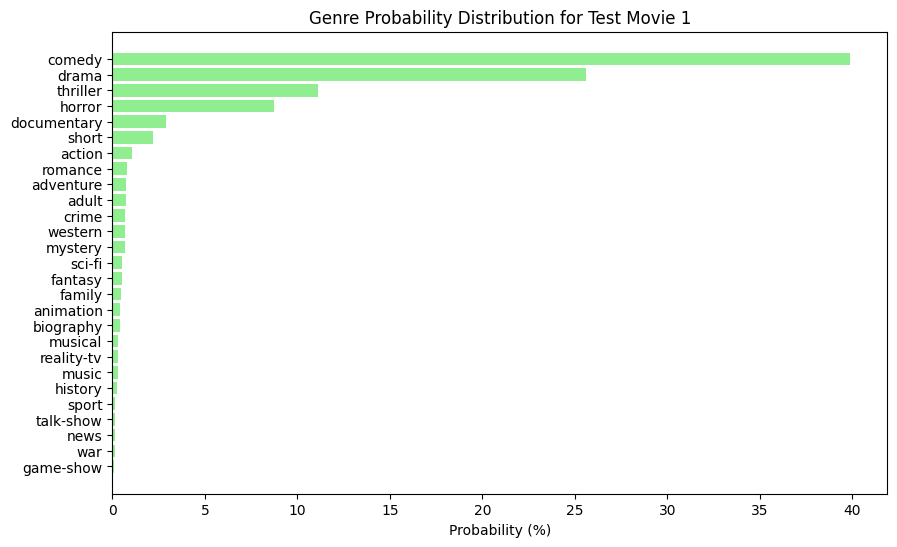

In [26]:
# Get probabilities for the first movie in test set
proba = model.predict_proba(X_test[0])

# Convert to a flat array
proba = proba.flatten()

# Get genre names
genre_names = label_encoder.classes_

# Pair genres with probabilities
genre_proba = list(zip(genre_names, proba))

# Sort genres by probability (optional)
genre_proba = sorted(genre_proba, key=lambda x: x[1], reverse=True)

import matplotlib.pyplot as plt

# Separate genres and probabilities
genres = [g[0] for g in genre_proba]
probs = [g[1]*100 for g in genre_proba]  # Convert to %

# Plot
plt.figure(figsize=(10,6))
plt.barh(genres, probs, color='lightgreen')
plt.xlabel('Probability (%)')
plt.title('Genre Probability Distribution for Test Movie 1')
plt.gca().invert_yaxis()  # Highest probability on top
plt.show()


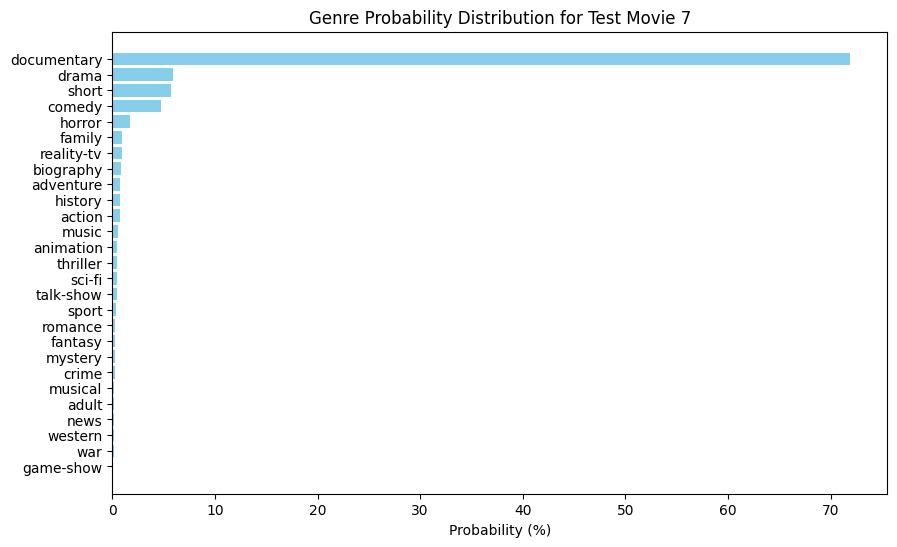

In [27]:
movie_index = 6 # Any index you like

proba = model.predict_proba(X_test[movie_index]).flatten()
genre_proba = list(zip(genre_names, proba))
genre_proba = sorted(genre_proba, key=lambda x: x[1], reverse=True)

# Plot as before
plt.figure(figsize=(10,6))
plt.barh([g[0] for g in genre_proba], [g[1]*100 for g in genre_proba], color='skyblue')
plt.xlabel('Probability (%)')
plt.title(f'Genre Probability Distribution for Test Movie {movie_index+1}')
plt.gca().invert_yaxis()
plt.show()


In [28]:
from sklearn.preprocessing import OneHotEncoder

# Reshape Emotion column
emotion_encoded = data['Emotion'].values.reshape(-1, 1)

# One-hot encode
onehot = OneHotEncoder(sparse_output=False)
emotion_features = onehot.fit_transform(emotion_encoded)

# Check shape
print(f"Emotion feature shape: {emotion_features.shape}")


Emotion feature shape: (54214, 5)


In [29]:
from scipy.sparse import hstack
import numpy as np

# Sentiment as a column vector
sentiment_feature = np.array(data['Sentiment']).reshape(-1, 1)

# Combine features
X_combined = hstack([X, sentiment_feature, emotion_features])

print(f"Final combined feature shape: {X_combined.shape}")

Final combined feature shape: (54214, 5006)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Logistic Regression or Random Forest
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Sentiment & Emotion: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy with Sentiment & Emotion: 0.58
Classification Report:
              precision    recall  f1-score   support

      action       0.55      0.27      0.36       263
       adult       0.75      0.21      0.33       112
   adventure       0.44      0.15      0.22       139
   animation       0.73      0.11      0.18       104
   biography       0.00      0.00      0.00        61
      comedy       0.50      0.57      0.53      1443
       crime       0.40      0.02      0.04       107
 documentary       0.66      0.84      0.74      2659
       drama       0.54      0.77      0.64      2697
      family       0.41      0.07      0.12       150
     fantasy       0.25      0.01      0.03        74
   game-show       0.95      0.50      0.66        40
     history       0.00      0.00      0.00        45
      horror       0.61      0.57      0.59       431
       music       0.63      0.49      0.55       144
     musical       0.50      0.02      0.04        50
     mystery      

C:\Users\Mrunal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrunal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mrunal\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

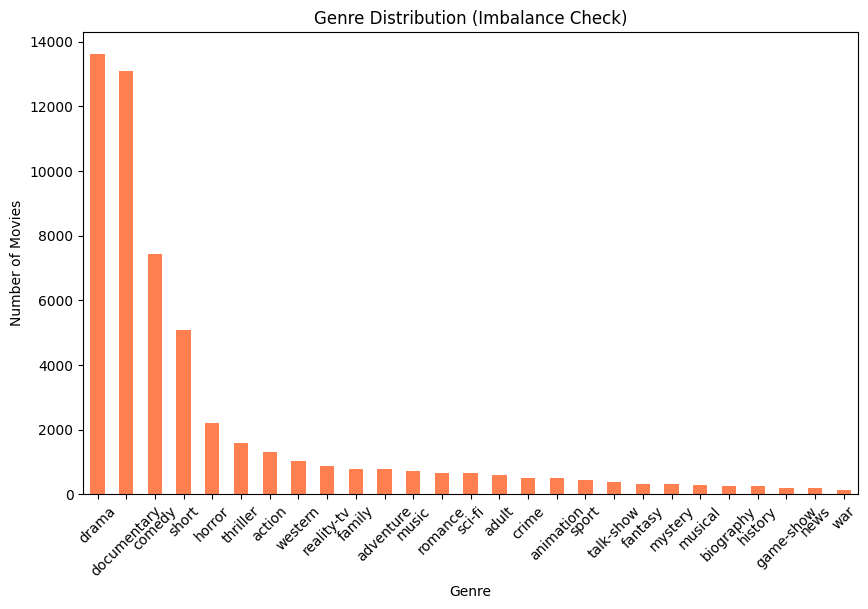

In [31]:
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='coral')
plt.title('Genre Distribution (Imbalance Check)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [32]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [33]:
import re

# Function to extract year
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        return int(match.group(1))
    return None  # If year not found

# Apply to Title column
data['Year'] = data['Title'].apply(extract_year)

# Quick check
print(data[['Title', 'Year']].head())


                              Title    Year
0      Oscar et la dame rose (2009)  2009.0
1                      Cupid (1997)  1997.0
2  Young, Wild and Wonderful (1980)  1980.0
3             The Secret Sin (1915)  1915.0
4            The Unrecovered (2007)  2007.0


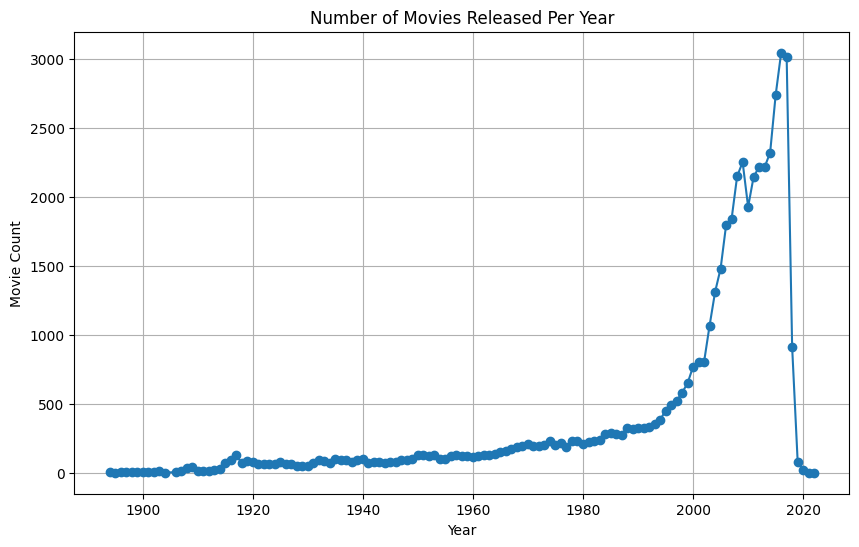

In [34]:
# Drop rows where year couldn't be extracted
data = data.dropna(subset=['Year'])
data['Year'] = data['Year'].astype(int)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
data['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Movie Count')
plt.grid()
plt.show()


Top Genres: ['documentary', 'drama', 'comedy']


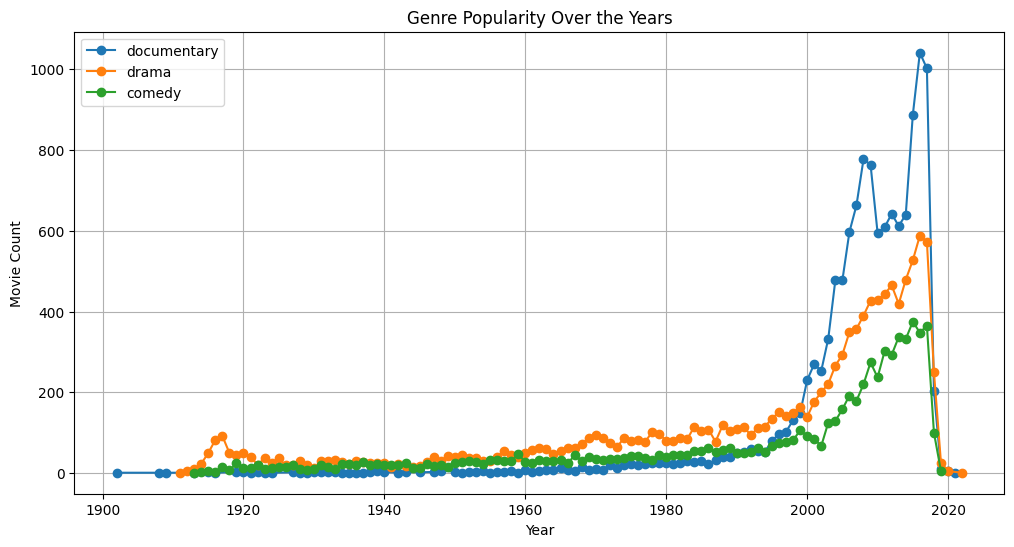

In [35]:
# Select top 3 most common genres
top_genres = data['Genre'].value_counts().head(3).index.tolist()
print(f"Top Genres: {top_genres}")

plt.figure(figsize=(12,6))

# Plot each genre's yearly trend
for genre in top_genres:
    genre_data = data[data['Genre'] == genre]
    genre_yearly = genre_data['Year'].value_counts().sort_index()
    plt.plot(genre_yearly.index, genre_yearly.values, marker='o', label=genre)

plt.title('Genre Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Movie Count')
plt.legend()
plt.grid()
plt.show()


In [36]:
import pickle

# Save TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Save Label Encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Save your trained model (LogisticRegression or RandomForest etc.)
with open('genre_model.pkl', 'wb') as f:
    pickle.dump(model, f)
